# P1 - Experience with Pandas



In this project, you will be working with the Global Land Temperature Data set. 

    "Berkeley Earth provides high-resolution land and ocean time series data and gridded temperature data. Our
    peer-reviewed methodology incorporates more temperature observations than other available products, and often
    has better coverage. Global datasets begin in 1850, with some land-only areas reported back to 1750. The 
    newest generation of our products are augmented by machine learning techniques to improve the spatial 
    resolution. This allows Berkeley Earth to provide the most comprehensive, high-resolution instrumental
    temperature data product available."
    -- https://berkeleyearth.org/data/

The data we will be working with is available online at: 
https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TAVG_daily.txt

Be sure to investigate and understand the data, format, and descriptions provided.



### Autograder Setup

You will have access to a few tests for the project.  Note, when you submit the autograder will run additional "hidden" tests on your solutions. 

Always make sure that you are answering the question as asked.  Do not rely on passing the public tests to ensure that you have correctly or completely answered the problems. 
 

### Project Setup 

You should use the following libraries to complete this assignment:

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import os
import otter
grader = otter.Notebook()

## 1. (20 pts) Get the Data

Read in the data from the link provided.  



### 1a. Load the data

Write a function to read in the data to a DataFrame object.  
In the function, you will print the number of rows, columns, and data types of each column using a print statement.

The function includes a few arguments that may be helpful for using the [`read_csv` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 

Make sure to use the same column names as given in the data, but replacing '*space* ' with '_'.
    
*Hint: Column names should be coded as `Date_Number`, `Year`, `Month`, `Day`, `Day_of_Year`, `Anomaly`.*

In [2]:
def p1_q1a(url, column_names=None, separator=',', paramA=None):
    '''
    - Description - 
    Read in data from URL to a DataFrame object 
    Report the number of rows and columns with a print statement.
    Addtionally, print the data types of each column
    Use pandas.read_csv(...):
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

    - Inputs - 
    url: location of dataset file, filepath_or_buffer
    column_names: list of column names to add to DataFrame (default is None)
    separator: delimiter to use (default is a comma)
    paramA: additional parameter that may be passed to read_csv (default is None)

    - Outputs - 
    df: return object is a DataFrame

    - Print Statements you should include - 
    print("Number of Rows: ...")
    print("Number of Columns: ...")
    print("Column Data Types:")
    print(Data Types)
    '''

    df = pd.read_csv(url, names=column_names, sep=separator, comment=paramA)
    print("Number of Rows: " + str(len(df.index)))
    print("Number of Columns: " + str(len(df.columns)))
    print("Column Data Types:")
    print(df.dtypes)
    return df


url = 'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TAVG_daily.txt'
cnames = ['Date_Number', 'Year', 'Month', 'Day', 'Day_of_Year', 'Anomaly']
separator = r'\s+'
argA = '%'

climate = p1_q1a(url, cnames, separator, argA)
climate

Number of Rows: 52077
Number of Columns: 6
Column Data Types:
Date_Number    float64
Year             int64
Month            int64
Day              int64
Day_of_Year      int64
Anomaly        float64
dtype: object


,Date_Number,Year,Month,Day,Day_of_Year,Anomaly
0,1880.001,1880,1,1,1,-0.692
1,1880.004,1880,1,2,2,-0.592
2,1880.007,1880,1,3,3,-0.673
3,1880.010,1880,1,4,4,-0.615
4,1880.012,1880,1,5,5,-0.681
...,...,...,...,...,...,...
52072,2022.568,2022,7,27,208,1.639
52073,2022.571,2022,7,28,209,1.631
52074,2022.574,2022,7,29,210,1.574
52075,2022.577,2022,7,30,211,1.577


In [3]:
grader.check("p1_q1a")

p1_q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

### 1b. Understand the Data

What are the column names and what do they correspond to? *Use this Markdown cell to describe each succinctly (< 15 words per column)*

Also, provide example code on how to detect if there are missing data in each column. This should only be a single line of code. *You can add a code cell to run the code and determine if there is missing entries, but then delete the cell you added.*

State whether there is any missing entries in the DataFrame. 

* `Date_Number` is the sequential number representing the date.
* `Year` is the year of the observation.
* `Month` is the month of the year.
* `Day` is the day of the month.
* `Day_of_Year` is the day number in the year.
* `Anomaly` is the temperature anomaly in °C.

Code for missing entries for each column 
```
climate.isnull().sum()

```

There is no missing data

In [4]:
#climate.isnull().sum()

<!-- END QUESTION -->

## 2. (8 pts) Manipulate Data

### 2a.  Add Temperature Column 

Add a new column to your DataFrame. 

The new column `Temp_C` adds the anomaly information to the estimated average temperature given in the data description (use the value and ignore the +/- part).  

In [5]:
# Create new column "Temp_C" 
climate['Temp_C'] = climate['Anomaly'] + 8.59
climate['Temp_C'].mean()

8.688502563511724

In [6]:
grader.check("p1_q2a")

p1_q2a results: All test cases passed!

### 2b. Add Temperature in Fahrenheit 

While much of the world using temperature in Celsius, the US uses Fahrenheit.  Add a column to the data `Temp_F` that reports the temperature of each value in Fahrenheit. 

$$ TempF = TempC * \frac{9}{5} + 32 $$

In [7]:
climate['Temp_F'] = climate['Temp_C'] * (9 / 5) + 32
climate['Temp_F'].mean()

47.6393046143211

In [8]:
grader.check("p1_q2b")

p1_q2b results: All test cases passed!

## 3. (37 pts) Calculate Statistics and Create Visualizations 
Pandas DataFrames have several methods for manipulation, aggregation, and calculation of meaningful statistics. The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is very helpful to understand attributes and methods. Matplotlib [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) integrates well with both pandas DataFrames and numpy arrays for visualization tasks.

### 3a. Calculate the mean temp by year.

Create an `Index` of `years` and an 1-dimensional array of corresponding `mean_temp_year` holding the mean temperature for each year.  

Use `Temp_F` or temperature in Farhenheit data.  

*Hint: Use methods like `.groupby()` and `.mean()` to get the proper data, then use the `.keys()` method to get an index, and `.values` for an array.*



In [9]:
grouped_data = climate.groupby('Year')['Temp_F'].mean()
years = grouped_data.keys()
mean_temp_year = grouped_data.values
print(years[0:5])
print(mean_temp_year[0:5])

Index([1880, 1881, 1882, 1883, 1884], dtype='int64', name='Year')
[46.39200328 46.85968055 46.60975178 46.39126137 46.04338361]


In [10]:
grader.check("p1_q3a")

p1_q3a results: All test cases passed!

<!-- BEGIN QUESTION -->

### 3b. Plot `mean_temp_year` vs. `years`

Plot the mean temperature per year vs. years.  

Select an appropriate plot type.  

Be sure to include a plot title, x-axis label, and y-axis label. 

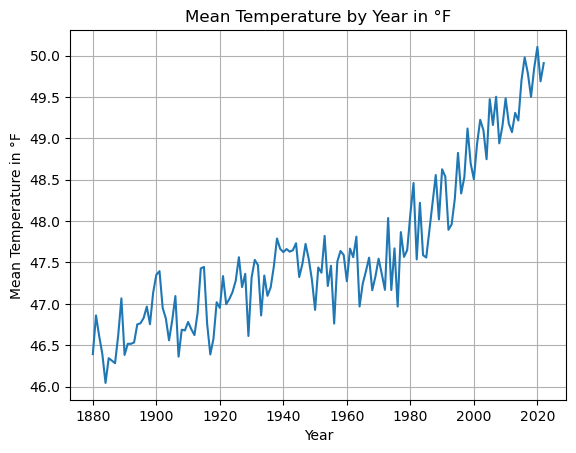

In [11]:
# Plot for each year (x-axis) vs. the "mean_temp_year" value (y-axis)
plt.plot(years, mean_temp_year)
plt.xlabel('Year')
plt.ylabel('Mean Temperature in °F')
plt.title('Mean Temperature by Year in °F')
plt.grid(True)
plt.show()

<!-- END QUESTION -->

### 3c. Calculate the mean anomaly by month
Create an `Index` of `months` and an array of `mean_anomaly_month` with the mean anomaly for each month. 

In [12]:
grouped_anomaly_data = climate.groupby('Month')['Anomaly'].mean()
months = grouped_anomaly_data.keys()
mean_anomaly_month = grouped_anomaly_data.values

print('Months index:\n', months[0:5])
print('Means array:\n', mean_anomaly_month[0:5])

Months index:
 Index([1, 2, 3, 4, 5], dtype='int64', name='Month')
Means array:
 [0.01616693 0.03280391 0.14885924 0.31274965 0.17484615]


In [13]:
grader.check("p1_q3c")

p1_q3c results: All test cases passed!

<!-- BEGIN QUESTION -->

### 3d. Plot `mean_anomaly_month` vs. `months`

Select an appropriate type of plot. 

Be sure to include a plot title, x-axis label, y-axis label, and black horizontal line at 0 mean anomaly on the plot. 

Label the months with 3 letter abbreviations: Jan, Feb, Mar, Apr, ...

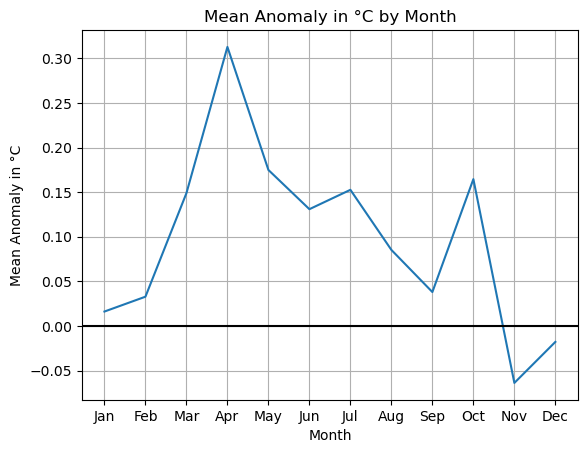

In [14]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, mean_anomaly_month)
plt.xlabel('Month')
plt.ylabel('Mean Anomaly in °C')
plt.title('Mean Anomaly in °C by Month')
plt.xticks(ticks=months, labels=month_labels)
plt.axhline(0, color='black')
plt.grid(True)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3e. Plot distribution of the Anomaly data.

Create an overlapping density plot of the Anomaly data for three time periods: 

* before the average time period, labeled 'Before Ave.'
* during the average time period, labeled 'Ave. Period'
* after the average time period, labeled 'After Ave.'

Ensure that the density plots are normalized independently. 

Be sure to include a plot title, x-axis label, and y-axis label.

**HINT** You may want to use [seaborn's `kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).  You can also add a new column to the data specifying the time periods. 

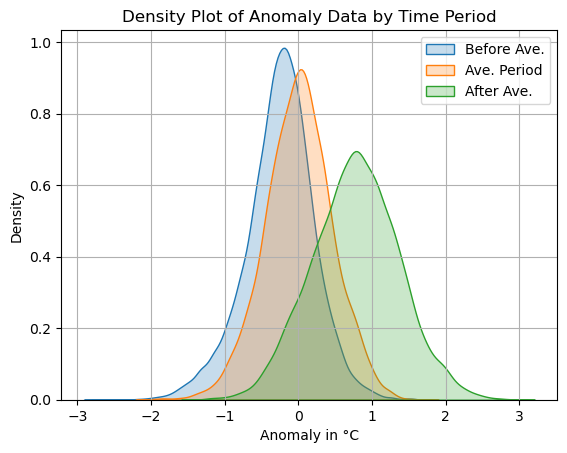

In [15]:
#Function to find the time period
def find_timeperiod(row):
    if row['Year'] < 1951: return 'Before Ave.'
    elif 1951 <= row['Year'] <= 1980: return 'Ave. Period'
    else: return 'After Ave.'
climate['Time_Period'] = climate.apply(find_timeperiod, axis=1)

#Plotting
sns.kdeplot(climate[climate['Time_Period'] == 'Before Ave.']['Anomaly'], label='Before Ave.', fill=True)
sns.kdeplot(climate[climate['Time_Period'] == 'Ave. Period']['Anomaly'], label='Ave. Period', fill=True)
sns.kdeplot(climate[climate['Time_Period'] == 'After Ave.']['Anomaly'], label='After Ave.', fill=True)
plt.title('Density Plot of Anomaly Data by Time Period')
plt.xlabel('Anomaly in °C')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

<!-- END QUESTION -->

## 4. (25 pts) Get Additional Data and Explore

Let's also add additional information on the daily land-average max and min temperatures. 



### 4a. Load the additional data 

First, load in the data from the provide url's.  Use `pandas` `read_csv` function specifying the proper parameters. 

Use the same column names as in Question 1A. 

In [16]:
url_max = 'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TMAX_daily.txt'
url_min = 'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TMIN_daily.txt'

column_names = ['Date_Number', 'Year', 'Month', 'Day', 'Day_of_Year', 'Anomaly']
climate_max = pd.read_csv(url_max, sep=r'\s+', names=column_names, comment='%')
climate_min = pd.read_csv(url_min, sep=r'\s+', names=column_names, comment='%')

climate_max = climate_max.drop_duplicates()
climate_min = climate_min.drop_duplicates()

print(f"Expected climate_max shape: (52564, 6), Actual: {climate_max.shape}")
print(f"Expected climate_min shape: (52503, 6), Actual: {climate_min.shape}")

print(climate_max.head())
print(climate_min.head())

Expected climate_max shape: (52564, 6), Actual: (52808, 6)
Expected climate_min shape: (52503, 6), Actual: (52808, 6)
   Date_Number  Year  Month  Day  Day_of_Year  Anomaly
0     1880.001  1880      1    1            1   -0.194
1     1880.004  1880      1    2            2   -0.021
2     1880.007  1880      1    3            3   -0.088
3     1880.010  1880      1    4            4   -0.026
4     1880.012  1880      1    5            5   -0.046
   Date_Number  Year  Month  Day  Day_of_Year  Anomaly
0     1880.001  1880      1    1            1   -1.072
1     1880.004  1880      1    2            2   -0.913
2     1880.007  1880      1    3            3   -0.994
3     1880.010  1880      1    4            4   -0.880
4     1880.012  1880      1    5            5   -0.976


In [17]:
grader.check("p1_q4a")

p1_q4a results:
    p1_q4a - 1 result:
        ❌ Test case failed
        Trying:
            climate_max.shape == (52564, 6)
        Expecting:
            True
        **********************************************************************
        Line 1, in p1_q4a 0
        Failed example:
            climate_max.shape == (52564, 6)
        Expected:
            True
        Got:
            False

    p1_q4a - 2 result:
        ❌ Test case failed
        Trying:
            climate_min.shape == (52503, 6)
        Expecting:
            True
        **********************************************************************
        Line 1, in p1_q4a 1
        Failed example:
            climate_min.shape == (52503, 6)
        Expected:
            True
        Got:
            False

    p1_q4a - 3 result:
        ✅ Test case passed

    p1_q4a - 4 result:
        ✅ Test case passed

### 4b. Create single data frame

Create a single DataFrame with the following columns: `Date_Number`, `Year`, `Month`, `Day`, `Day_of_Year`, `Temp_AVG`, `Temp_MIN`, and `Temp_MAX`.  The temperatures should reported in degree Celsius.  For the new DataFrames, `climate_min` and `climate_max` you will need to calculate temperature from the anomaly data.  

The DataFrame should only contain observations when all temperature values (avg, min, max) are available.  

You can assume that the date indices are the same for each data set and not missing any days. 

**Note:** You should not use the `merge` or `join` functions. 

In [18]:
base_temp_celsius = 8.59

climate['Temp_AVG'] = climate['Anomaly'] + base_temp_celsius
climate_min['Temp_MIN'] = climate_min['Anomaly'] + base_temp_celsius
climate_max['Temp_MAX'] = climate_max['Anomaly'] + base_temp_celsius

full_data = pd.DataFrame({
    'Date_Number': climate['Date_Number'],
    'Year': climate['Year'],
    'Month': climate['Month'],
    'Day': climate['Day'],
    'Day_of_Year': climate['Day_of_Year'],
    'Temp_AVG': climate['Temp_AVG'],
    'Temp_MIN': climate_min['Temp_MIN'],
    'Temp_MAX': climate_max['Temp_MAX']
})

print(f"Expected full_data shape: (52077, 8), Actual: {full_data.shape}")

full_data.head()

Expected full_data shape: (52077, 8), Actual: (52808, 8)


,Date_Number,Year,Month,Day,Day_of_Year,Temp_AVG,Temp_MIN,Temp_MAX
0,1880.001,1880.0,1.0,1.0,1.0,7.898,7.518,8.396
1,1880.004,1880.0,1.0,2.0,2.0,7.998,7.677,8.569
2,1880.007,1880.0,1.0,3.0,3.0,7.917,7.596,8.502
3,1880.010,1880.0,1.0,4.0,4.0,7.975,7.710,8.564
4,1880.012,1880.0,1.0,5.0,5.0,7.909,7.614,8.544


In [19]:
grader.check("p1_q4b")

p1_q4b results:
    p1_q4b - 1 result:
        ❌ Test case failed
        Trying:
            full_data.shape == (52077, 8)
        Expecting:
            True
        **********************************************************************
        Line 1, in p1_q4b 0
        Failed example:
            full_data.shape == (52077, 8)
        Expected:
            True
        Got:
            False

    p1_q4b - 2 result:
        ✅ Test case passed

    p1_q4b - 3 result:
        ✅ Test case passed

<!-- BEGIN QUESTION -->

### 4c. Plot mean, min, and max anomolies 

Create a plot showing the average temperature average for each year, the minimum temperature minimum for each year, and maximum temperate maximum for each year. 

Only plot the years since 1950.  

Consider using the [`agg` function](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html#) after doing a `groupby` operation.  Explore how to use `agg` to simplify your code. 



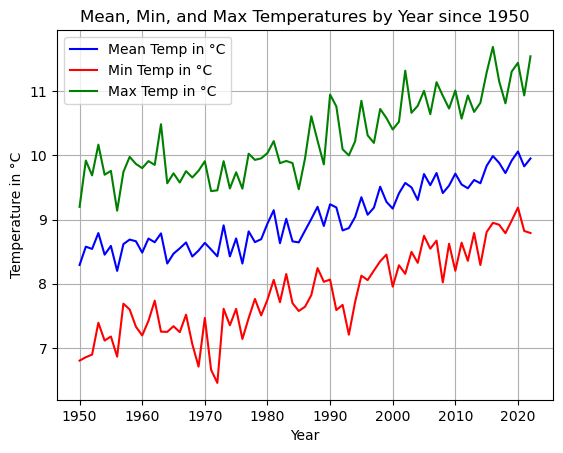

In [20]:
#Filtering the right data
data_since_1950 = full_data[full_data['Year'] >= 1950]
stats = data_since_1950.groupby('Year').agg({ 'Temp_AVG': 'mean', 'Temp_MIN': 'min', 'Temp_MAX': 'max' })

#Plot
plt.plot(stats.index, stats['Temp_AVG'], label='Mean Temp in °C', color='blue')
plt.plot(stats.index, stats['Temp_MIN'], label='Min Temp in °C', color='red')
plt.plot(stats.index, stats['Temp_MAX'], label='Max Temp in °C', color='green')
plt.xlabel('Year')
plt.ylabel('Temperature in °C')
plt.title('Mean, Min, and Max Temperatures by Year since 1950')
plt.legend()
plt.grid(True)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5. Bonus 

Here is a bonus question. 

#### Bonus Plot 

The plot should show the average temperature difference for each day (max - min) since 1950 for each month. 

Label the months with 3 letter abbreviations: Jan, Feb, Mar, Apr, ...

Choose an appropriate type of plot for this type of information. 


/tmp/ipykernel_538/1639150943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_since_1950['Temp_Diff'] = data_since_1950['Temp_MAX'] - data_since_1950['Temp_MIN']


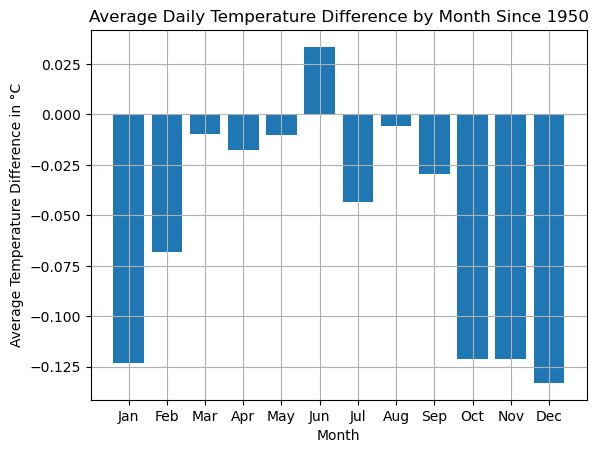

In [21]:
data_since_1950 = full_data[full_data['Year'] >= 1950]
data_since_1950['Temp_Diff'] = data_since_1950['Temp_MAX'] - data_since_1950['Temp_MIN']
monthly_temp_difference = data_since_1950.groupby('Month')['Temp_Diff'].mean()

month_labels2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(month_labels2, monthly_temp_difference)
plt.xlabel('Month')
plt.ylabel('Average Temperature Difference in °C')
plt.title('Average Daily Temperature Difference by Month Since 1950')
plt.grid(True)
plt.show()

<!-- END QUESTION -->

## Congratulations! You have finished P1! 

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the P1 assignment on Gradescope, Gradescope will automatically submit a PDF file with some of your answers to the P1 - Figures assignment (making them easier to grade). 

**Important**: Please check that your responses were generated and submitted correctly to the P1 - Figures Assignment. 

**You are responsible for ensuring your submission follows our requirements and that the PDF for P1 - Figures answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with the submission, contact course staff well-ahead of the deadline. 

Make sure you have run all cells in your notebook **in order** before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [22]:
# Save your notebook first, then run this cell to export your submission.
grader.export()